In [ ]:
!pip install mediapipe opencv-python
!pip install numpy
!pip install opencv-python


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import cv2
import mediapipe as mp
import numpy as np

cap = cv2.VideoCapture(0)

background_img = cv2.imread("background.jpg") 
background_img = cv2.resize(background_img, (640, 480))

mp_selfie_segmentation = mp.solutions.selfie_segmentation
segmentor = mp_selfie_segmentation.SelfieSegmentation(model_selection=1)

while True:
    ret, frame = cap.read()
    if not ret:
        break
    frame = cv2.flip(frame, 1) 
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    results = segmentor.process(rgb_frame)
    mask = results.segmentation_mask

    condition = mask > 0.6  

    output = np.where(condition[..., None], frame, background_img)

    cv2.imshow("Virtual Background", output)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [1]:
import cv2
import mediapipe as mp
import numpy as np

# Open webcam
cap = cv2.VideoCapture(0)

# Load background image
background_img = cv2.imread("background.jpg")

# Initialize MediaPipe selfie segmentation
mp_selfie_segmentation = mp.solutions.selfie_segmentation
segmentor = mp_selfie_segmentation.SelfieSegmentation(model_selection=1)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Flip the frame horizontally for natural selfie view
    frame = cv2.flip(frame, 1)

    # Convert frame to RGB for MediaPipe
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Get segmentation mask
    results = segmentor.process(rgb_frame)
    mask = results.segmentation_mask

    # Threshold the mask
    condition = mask > 0.6

    # Resize background to match the current frame size
    bg_resized = cv2.resize(background_img, (frame.shape[1], frame.shape[0]))

    # Combine background and frame using the condition mask
    output = np.where(condition[..., None], frame, bg_resized)

    # Display the output
    cv2.imshow("Virtual Background", output)

    # Exit on 'q' key
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Cleanup
cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1301: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


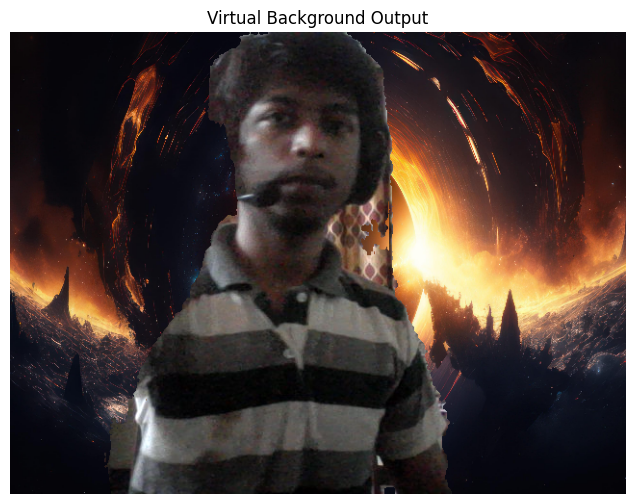

In [2]:
import cv2
import mediapipe as mp
import numpy as np
from matplotlib import pyplot as plt

# Open webcam
cap = cv2.VideoCapture(0)

# Load background image
background_img = cv2.imread("background.jpg")

# Initialize MediaPipe selfie segmentation
mp_selfie_segmentation = mp.solutions.selfie_segmentation
segmentor = mp_selfie_segmentation.SelfieSegmentation(model_selection=1)

# Capture one frame to demonstrate
ret, frame = cap.read()
if ret:
    # Flip the frame
    frame = cv2.flip(frame, 1)

    # Convert to RGB
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Get segmentation mask
    results = segmentor.process(rgb_frame)
    mask = results.segmentation_mask

    # Apply threshold
    condition = mask > 0.6

    # Resize background
    bg_resized = cv2.resize(background_img, (frame.shape[1], frame.shape[0]))

    # Apply virtual background
    output = np.where(condition[..., None], frame, bg_resized)

    # Convert to RGB for displaying
    output_rgb = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)

    # Show using matplotlib
    plt.figure(figsize=(10, 6))
    plt.imshow(output_rgb)
    plt.axis('off')
    plt.title("Virtual Background Output")
    plt.show()

# Release the webcam
cap.release()
